In [44]:
import datadotworld as dw
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
dataset = 'ljvmiranda921/pokemon-go-dataset'
pokemon_go_data = dw.load_dataset(dataset)
pokemon_go_data.dataframes

LazyLoadedDict({'pkmn_go': LazyLoadedValue(<pandas.DataFrame>)})

In [5]:
metadata = pokemon_go_data.describe()
metadata

{'name': 'ljvmiranda921_pokemon-go-dataset',
 'title': 'Pokemon GO Dataset',
 'description': "Pokemon data from the hit mobile game Pokemon Go.\n\n# Gotta Catch em All!\n\nCheck a sample visualization in my blog [here](https://ljvmiranda921.github.io/projects/2017/02/18/pokemon-go/)!\n\nThis is the dataset that I used for my Pok&eacute;mon GO data visualization found [here](https://ljvmiranda921.github.io/projects/2017/02/18/pokemon-go/). You can also\nfind the scripts I implemented to further process the data in this [repo](https://github.com/ljvmiranda921/pkmn), and a simple EDA [here](https://github.com/ljvmiranda921/pkmn/blob/master/Exploratory%20Data%20Analysis%20of%20Pokemon%20GO%20Dataset.ipynb).\n\n## Sourcing the data\nMost of the data were sourced from Reddit threads and Kaggle datasets. I arranged this data inside the `\\data\\pkmn-g0.csv` file. It is important to understand that most of these data are grounded on many assumptions and reverse engineering techniques done by o

In [8]:
display(Markdown(metadata['description']))

Pokemon data from the hit mobile game Pokemon Go.

# Gotta Catch em All!

Check a sample visualization in my blog [here](https://ljvmiranda921.github.io/projects/2017/02/18/pokemon-go/)!

This is the dataset that I used for my Pok&eacute;mon GO data visualization found [here](https://ljvmiranda921.github.io/projects/2017/02/18/pokemon-go/). You can also
find the scripts I implemented to further process the data in this [repo](https://github.com/ljvmiranda921/pkmn), and a simple EDA [here](https://github.com/ljvmiranda921/pkmn/blob/master/Exploratory%20Data%20Analysis%20of%20Pokemon%20GO%20Dataset.ipynb).

## Sourcing the data
Most of the data were sourced from Reddit threads and Kaggle datasets. I arranged this data inside the `\data\pkmn-g0.csv` file. It is important to understand that most of these data are grounded on many assumptions and reverse engineering techniques done by other people. Because Niantic and Nintendo's source code is proprietary (although some people were able to hack it inside), most of the rates were achieved by recognizing patterns and fitting methods.

### Catch and Flee Rates
For the catch and flee rates, the data was pulled by Reddit user [/u/The_Desert_Rain](https://www.reddit.com/user/The_Desert_Rain). In my visualization, I am using the base rates, this means that catching these Pok&eacute;mon gets harder as your level goes up. What these Redditors are doing is that they are trying to reverse engineer the formulas and game mechanics in PokemonGO. Because the actual data is hidden, they look for patterns and compute for expected outcomes. It's so geeky and exciting! You can read more of their analyses [here](https://www.reddit.com/r/TheSilphRoad/comments/4vs70r/analysis_on_catch_rates_and_encounters/) and [here](https://www.reddit.com/r/TheSilphRoad/comments/4v52le/base_capture_rate/).

### Spawn Rates
The spawn rate was taken from the PokemonGO Hub's [website](https://pokemongohub.net/pokemon-go-spawn-rate/). Their methodology involves scraping the data from [Pok&eacute; Radar](http://www.pokeradar.io/) and computed the percentages on a one-week period across approximately 100 million historical data points for the highest degree of accuracy. This then _normalizes_ the spawn rate irrespective of your geographical location.

### CP
CP Points were taken from a [Kaggle dataset](https://www.kaggle.com/abcsds/pokemongo).

In [9]:
data = dw.query(dataset,'SELECT * FROM pkmn_go').dataframe
data

,name,stamina,atk,def,capture_rate,flee_rate,spawn_chance,primary,secondary,cp,url
0,Bulbasaur,90,126,126,0.16,0.10,69.0,Grass,Poison,1079,http://cdn.bulbagarden.net/upload/thumb/2/21/0...
1,Ivysaur,120,156,158,0.08,0.07,4.2,Grass,Poison,1643,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
2,Venusaur,160,198,200,0.04,0.05,1.7,Grass,Poison,2598,http://cdn.bulbagarden.net/upload/thumb/a/ae/0...
3,Charmander,78,128,108,0.16,0.10,25.3,Fire,None,962,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
4,Charmeleon,116,160,140,0.08,0.07,1.2,Fire,None,1568,http://cdn.bulbagarden.net/upload/thumb/4/4a/0...
...,...,...,...,...,...,...,...,...,...,...,...
141,Scyther,140,176,180,0.24,0.09,14.0,Bug,Flying,2088,http://cdn.bulbagarden.net/upload/thumb/b/ba/1...
142,Jynx,130,172,134,0.24,0.09,35.0,Ice,Psychic,1728,http://cdn.bulbagarden.net/upload/thumb/7/7c/1...
143,Electabuzz,130,198,160,0.24,0.09,7.4,Electric,None,2134,http://cdn.bulbagarden.net/upload/thumb/d/de/1...
144,Magmar,130,214,158,0.24,0.09,10.0,Fire,None,2281,http://cdn.bulbagarden.net/upload/thumb/8/8c/1...


In [10]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

<AxesSubplot:xlabel='primary', ylabel='spawn_chance'>

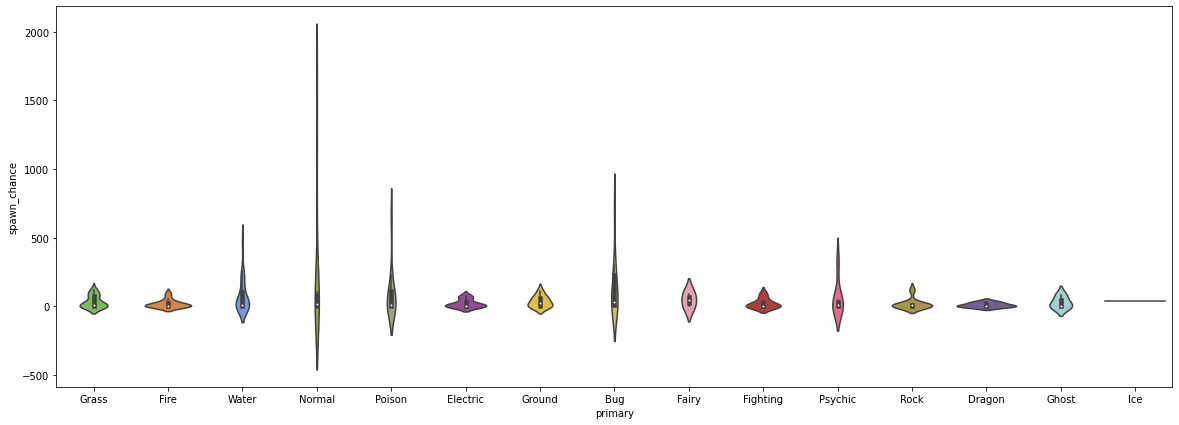

In [14]:
plt.figure(figsize=(20, 7))
sns.violinplot(x='primary', y='spawn_chance', data=data, 
               palette=pkmn_type_colors) # Set color palette

<AxesSubplot:xlabel='primary', ylabel='atk'>

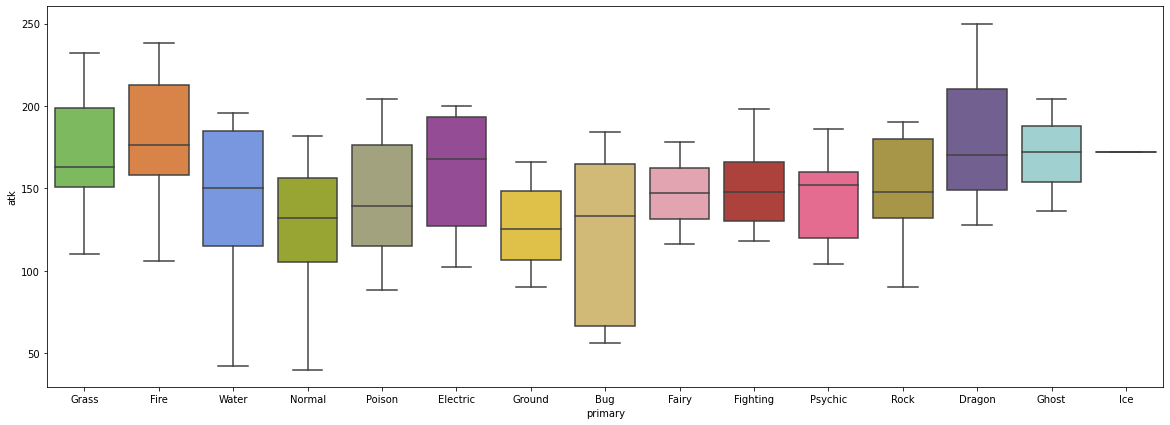

In [16]:
plt.figure(figsize=(20, 7))
sns.boxplot(x='primary', y='atk', data=data, 
               palette=pkmn_type_colors) # Set color palette

<AxesSubplot:xlabel='primary', ylabel='capture_rate'>

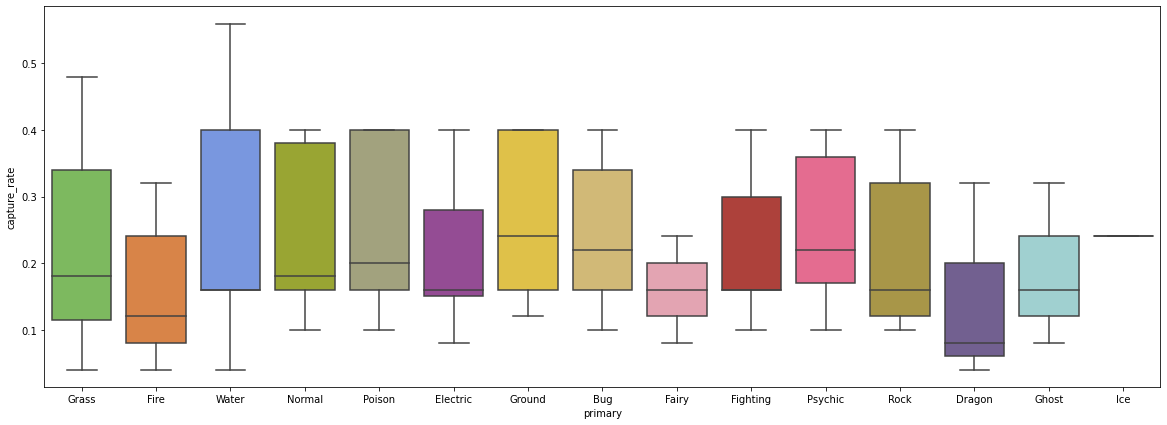

In [17]:
plt.figure(figsize=(20, 7))
sns.boxplot(x='primary', y='capture_rate', data=data, 
               palette=pkmn_type_colors) # Set color palette

<AxesSubplot:xlabel='primary', ylabel='cp'>

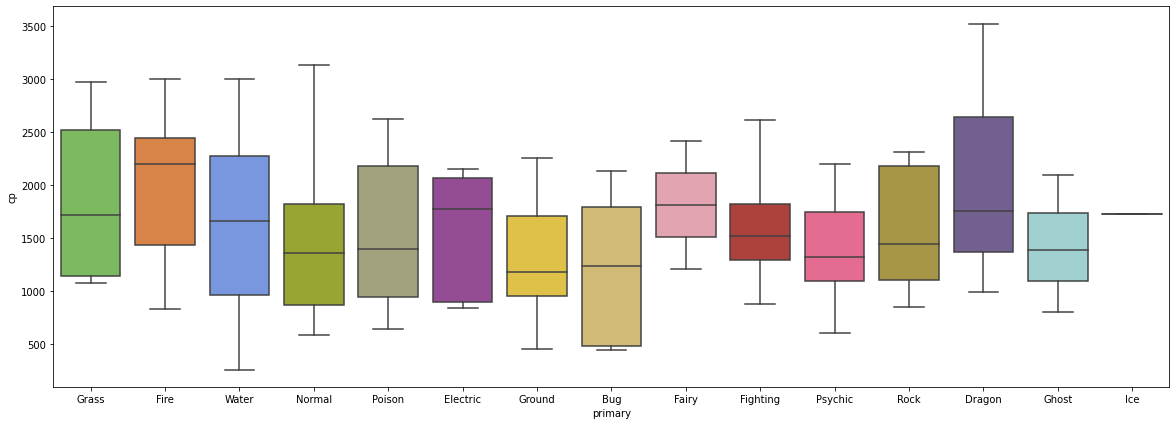

In [18]:
plt.figure(figsize=(20, 7))
sns.boxplot(x='primary', y='cp', data=data, 
               palette=pkmn_type_colors) # Set color palette

In [22]:
data.describe()

,stamina,atk,def,capture_rate,flee_rate,spawn_chance,cp
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,126.301370,148.273973,144.178082,0.230959,0.094521,75.705411,1577.650685
std,56.914379,40.403230,37.894897,0.122550,0.082446,198.501273,689.963903
min,20.000000,40.000000,54.000000,0.040000,0.050000,0.010000,264.000000
25%,90.000000,116.500000,112.500000,0.160000,0.060000,1.700000,976.500000
50%,120.000000,149.000000,148.000000,0.160000,0.090000,8.250000,1526.500000
75%,150.000000,179.500000,175.500000,0.400000,0.100000,64.500000,2136.250000
max,500.000000,250.000000,222.000000,0.560000,0.990000,1598.000000,3525.000000


In [29]:
stamina_bins = [0, 50, 100, 150]
stamina_labels = ['low', 'medium', 'high']
data["stamina_cats"] = pd.cut(data["stamina"], stamina_bins, labels=stamina_labels)

atk_bins = [0, 90, 180, 270]
atk_labels = ['low', 'medium', 'high']
data["atk_cats"] = pd.cut(data['atk'], atk_bins, labels=atk_labels)

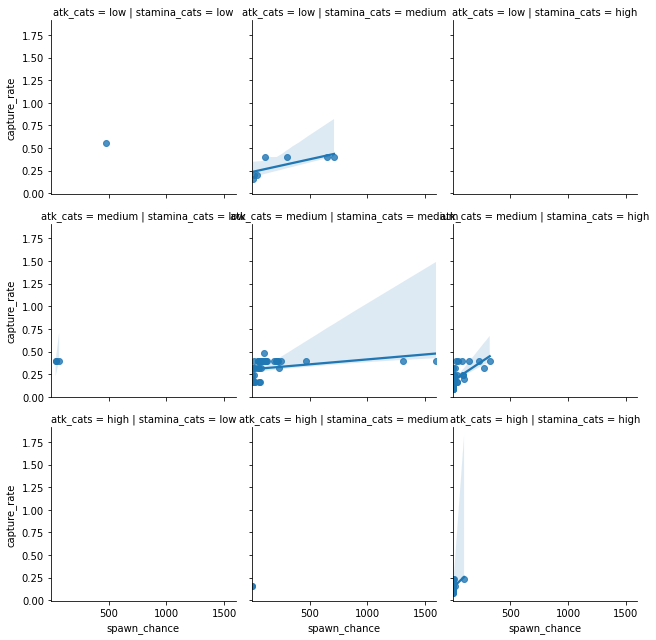

In [34]:
g = sns.FacetGrid(data, col="stamina_cats", row="atk_cats")
g.map(sns.regplot, "spawn_chance", "capture_rate")
g.add_legend();

<AxesSubplot:xlabel='spawn_chance', ylabel='capture_rate'>

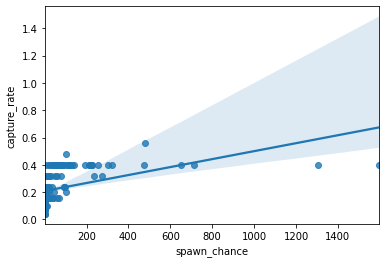

In [36]:
sns.regplot(data["spawn_chance"], data["capture_rate"])

<AxesSubplot:xlabel='atk', ylabel='def'>

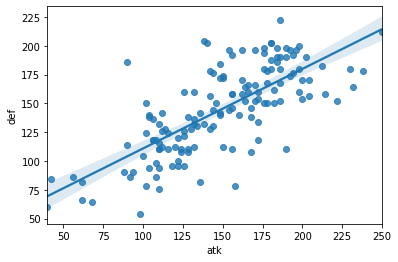

In [37]:
sns.regplot(data["atk"], data["def"])

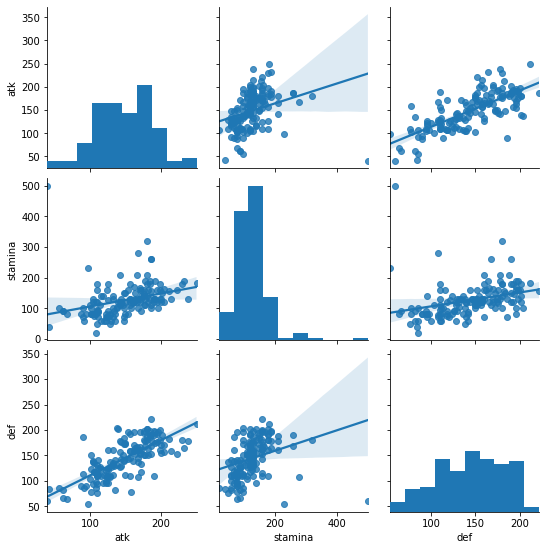

In [39]:
g = sns.PairGrid(data[["atk", "stamina", "def"]])
g = g.map_diag(plt.hist)
g = g.map_offdiag(sns.regplot)

Err ... let's remove the outliers so our relationships aren't so skewed

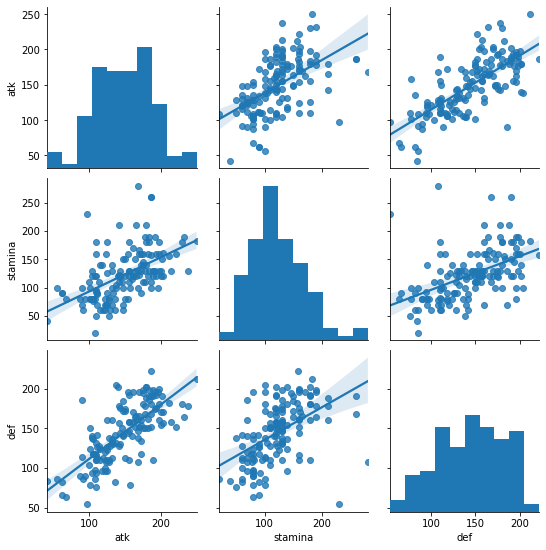

In [47]:
abs_scores = np.abs(stats.zscore(data[["atk", "def", "stamina"]]))
no_outlier_filt = (abs_scores < 3).all(axis=1)
no_outliers = data[no_outlier_filt]
g = sns.PairGrid(no_outliers[["atk", "stamina", "def"]])
g = g.map_diag(plt.hist)
g = g.map_offdiag(sns.regplot)